## 导入文件
- sheet_name=1（实际sheet2）

In [2]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=1)

# 取第2-25行数据（即All Alpha proteins数据），同理取其他的
df_allalpha = df.iloc[0:24, :]
df_allbeta = df.iloc[24:48, :]
df_alphabeta = df.iloc[48:72, :]

# 将三个DataFrame合并成一个DataFrame  
df = pd.concat([df_allalpha.assign(label='All alpha'), 
                df_allbeta.assign(label='All beta'), 
                df_alphabeta.assign(label='Alpha + beta')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
0         NaN     0.63396     0.55569  All alpha  
1         NaN         NaN         NaN  All alpha  
2         NaN         NaN         NaN  All alpha  
3         NaN         NaN         NaN  All alpha  
4     0.71275         NaN     0.35696  All alpha  
样本总量为:  72


## 看AF整体表现

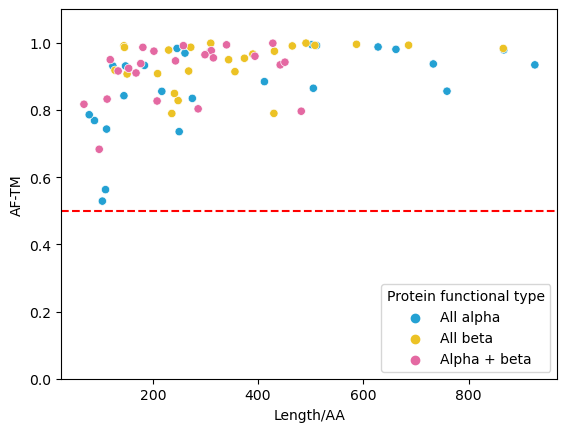

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=df, palette={'All alpha': '#24a1d3', 'All beta': '#ecc225', 'Alpha + beta': '#e469a2'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')
# plt.annotate('Threshold', xy=(10, 6.5), fontsize=12)

# 显示图例 
plt.legend(loc='lower right', title='Protein functional type')

plt.show()

100.0
100.0
100.0


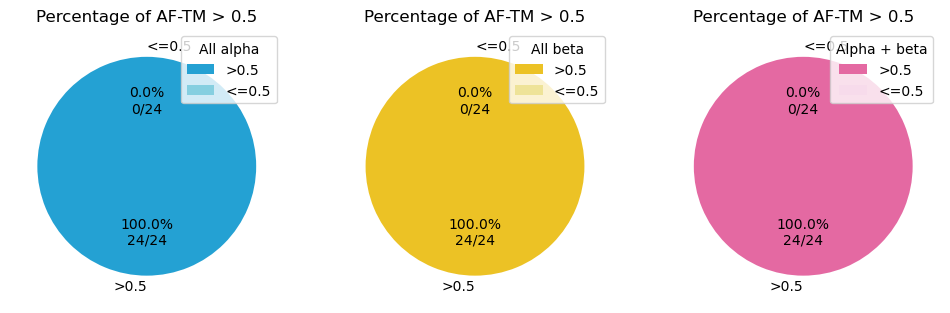

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
allalpha_total_tm = df_allalpha['AF-TM'].count()
allalpha_below6_tm = (df_allalpha['AF-TM'] > 0.5).sum()
allalpha_below6_percent = allalpha_below6_tm / allalpha_total_tm * 100
print(allalpha_below6_percent)

allbeta_total_tm = df_allbeta['AF-TM'].count()
allbeta_below6_tm = (df_allbeta['AF-TM'] > 0.5).sum()
allbeta_below6_percent = allbeta_below6_tm / allbeta_total_tm * 100
print(allbeta_below6_percent)

alphabeta_total_tm = df_alphabeta['AF-TM'].count()
alphabeta_below6_tm = (df_alphabeta['AF-TM'] > 0.5).sum()
alphabeta_below6_percent = alphabeta_below6_tm / alphabeta_total_tm * 100
print(alphabeta_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [allalpha_below6_tm, allalpha_total_tm - allalpha_below6_tm]
data2 = [allbeta_below6_tm, allbeta_total_tm - allbeta_below6_tm]
data3 = [alphabeta_below6_tm, alphabeta_total_tm - alphabeta_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#24a1d3', '#86cfe0']
colors2 = ['#ecc225', '#eee398']
colors3 = ['#e469a2', '#f7dbeb']

# 创建包含 3 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

if allalpha_below6_percent >= 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, allalpha_total_tm), startangle=90)
    axs[0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0].legend(labels, title='All alpha', loc='best')
else: 
    axs[0].axis('off')

if allbeta_below6_percent >= 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, allbeta_total_tm), startangle=90)
    axs[1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1].legend(labels, title='All beta', loc='best')
else: 
    axs[1].axis('off')

if alphabeta_below6_percent >= 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, alphabeta_total_tm), startangle=90)
    axs[2].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[2].legend(labels, title='Alpha + beta', loc='best')
else: 
    axs[2].axis('off')



# 显示饼图
plt.show()
